# HIV MODEL
Julia Benton

In [85]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [86]:
state=State(R=1000, L=0, E=0, V=100) #starting numbers of cells-stocks-these values will change as simulation runs
#R is activated, uninfected cells
#L is latently infected cells
#E is actively infected cells
#V is free virons
#numbers taken from the Phillips paper

system=System(π=100, σ=2, ρ=0.1, β=.00027, α=.036, δ=.33, μ=.00136, Γ=1.36, τ=.2, dt=0.1)  
#dt is explicit time step for Euler's method step
#flows-greek letters are constant values throughtout the simulation

,values
π,100.00000
σ,2.00000
ρ,0.10000
β,0.00027
α,0.03600
δ,0.33000
μ,0.00136
Γ,1.36000
τ,0.20000
dt,0.10000


In [87]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, 120):    #not linrange(t0, t_end) like in prey-pred run_simulation b/c start and end times aren't defined in the system created above
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [92]:
def update_func(state, t, system):
    """Update the HIV Model
    
    state: State(R, L, E, V)
    t: time
    system: System object
    
    returns: State(R, L, E, V)
    """
    unpack(system) #system has greek letters, which aren't changing
    R, L, E, V = state

    dR = ((Γ * τ) - (μ * R) - (β * R * V)) * dt       #Euler's method with explicit time step
    dL = ((ρ * β * R * V) - (μ * L) - (α * L)) * dt
    dE = ((1-ρ) * (β * R * V) + (α * L) - (δ * E) )* dt
    dV = ((π * E) - (σ * V) )* dt
     
    #updates stocks    
    R += dR
    L += dL
    E += dE
    V += dV
    
    return State(R=R, L=L, E=E, V=V)

In [93]:
results = run_simulation(system, update_func)
results.head()

,R,L,E,V
0,1000,0,0,100
1,997.191,0.27,2.43,80
2,994.929,0.484385,4.28932,88.3
3,992.449,0.719776,6.28433,113.533
4,989.299,1.02131,8.81756,153.67


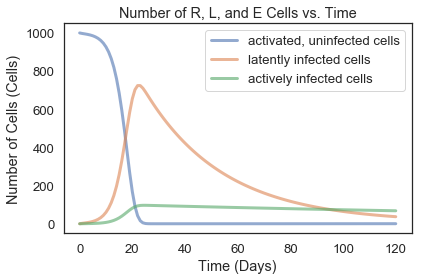

In [94]:
plot(results.R, label='activated, uninfected cells')
plot(results.E, label='latently infected cells')
plot(results.L, label='actively infected cells')
decorate(title='Number of R, L, and E Cells vs. Time',
         xlabel='Time (Days)', 
         ylabel='Number of Cells (Cells)')

#plot(results.V, '-y', label='free virons') taken out b/c V is so large we can't see R, E, and L


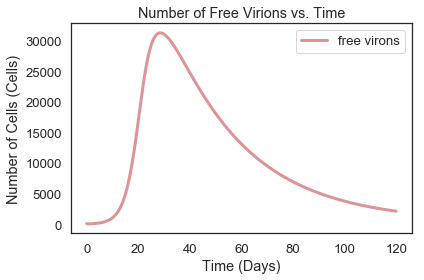

In [95]:
# V is on a graph of its own because the number of cells is so large we cannot see how R, L, and E change in the simulation
plot(results.V, '-r', label='free virons')
decorate(title='Number of Free Virions vs. Time',
         xlabel='Time (Days)', 
         ylabel='Number of Cells (Cells)')